In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(42)
rows = 120
age = np.random.normal(loc=30, scale=5, size=rows).round().astype(int)
salary = np.random.normal(loc=50000, scale=8000, size=rows)
outlier_indices = np.random.choice(rows, 6, replace=False)
salary[outlier_indices] = salary[outlier_indices] * 4
department = np.random.choice(['HR', 'IT', 'Finance', 'Sales'], size=rows)
gender = np.random.choice(['Male', 'Female', 'Other'], size=rows)
joining_date = pd.date_range(start="2023-01-01", periods=rows, freq='D')

# Column with ≥15% missing values
performance = np.random.randint(1, 11, size=rows).astype(float)
missing_count = int(0.20 * rows)
missing_idx = np.random.choice(rows, missing_count, replace=False)
performance[missing_idx] = np.nan


In [ ]:
df = pd.DataFrame({
    'Age': age,
    'Salary': salary,
    'Department': department,
    'Gender': gender,
    'JoiningDate': joining_date,
    'PerformanceScore': performance
})

In [ ]:
df.head()

,Age,Salary,Department,Gender,JoiningDate,PerformanceScore
0,32,56328.255576,HR,Female,2023-01-01,1.0
1,29,42724.900362,Finance,Male,2023-01-02,5.0
2,33,61222.354487,HR,Other,2023-01-03,9.0
3,38,38785.191498,Finance,Male,2023-01-04,1.0
4,29,54694.856750,HR,Other,2023-01-05,3.0


In [ ]:
print("\nOutlier Indices in Salary:", outlier_indices)



Outlier Indices in Salary: [52 40 94 58 35  5]


In [ ]:
df.tail()

,Age,Salary,Department,Gender,JoiningDate,PerformanceScore
115,32,55071.352179,HR,Male,2023-04-26,7.0
116,30,33798.859307,HR,Male,2023-04-27,3.0
117,24,51491.634518,IT,Female,2023-04-28,7.0
118,36,44705.708282,Sales,Female,2023-04-29,2.0
119,34,56819.466678,IT,Other,2023-04-30,10.0


In [ ]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 120
Columns: 6


In [ ]:
df.dtypes

,0
Age,int64
Salary,float64
Department,object
Gender,object
JoiningDate,datetime64[ns]
PerformanceScore,float64


In [ ]:
df.isna().sum()

,0
Age,0
Salary,0
Department,0
Gender,0
JoiningDate,0
PerformanceScore,24


In [ ]:
df.describe(include='all')

,Age,Salary,Department,Gender,JoiningDate,PerformanceScore
count,120.000000,120.000000,120,120,120,96.000000
unique,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,HR,Male,NaN,NaN
freq,NaN,NaN,37,54,NaN,NaN
mean,29.600000,58063.793051,NaN,NaN,2023-03-01 12:00:00,5.072917
min,17.000000,33798.859307,NaN,NaN,2023-01-01 00:00:00,1.000000
25%,27.000000,44110.327881,NaN,NaN,2023-01-30 18:00:00,2.000000
50%,30.000000,51930.986190,NaN,NaN,2023-03-01 12:00:00,5.000000
75%,32.000000,56265.106438,NaN,NaN,2023-03-31 06:00:00,8.000000
max,42.000000,270094.580026,NaN,NaN,2023-04-30 00:00:00,10.000000


In [ ]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


Column: Age
Age
32    12
29    12
28    12
30    12
27     9
31     9
35     7
34     6
23     6
24     5
26     5
38     4
33     4
20     4
25     3
37     3
21     2
39     2
17     1
42     1
36     1
Name: count, dtype: int64

Column: Salary
Salary
56328.255576    1
42724.900362    1
61222.354487    1
38785.191498    1
54694.856750    1
               ..
55071.352179    1
33798.859307    1
51491.634518    1
44705.708282    1
56819.466678    1
Name: count, Length: 120, dtype: int64

Column: Department
Department
HR         37
Finance    32
IT         27
Sales      24
Name: count, dtype: int64

Column: Gender
Gender
Male      54
Female    33
Other     33
Name: count, dtype: int64

Column: JoiningDate
JoiningDate
2023-01-01    1
2023-01-02    1
2023-01-03    1
2023-01-04    1
2023-01-05    1
             ..
2023-04-26    1
2023-04-27    1
2023-04-28    1
2023-04-29    1
2023-04-30    1
Name: count, Length: 120, dtype: int64

Column: PerformanceScore
PerformanceScore
NaN     24
2.0  

In [ ]:
from scipy.stats import zscore
df_clean = df.copy()

In [ ]:
# Method A: Mean imputation for PerformanceScore
df_impute = df_clean.copy()
df_impute['PerformanceScore'] = df_impute['PerformanceScore'].fillna(
    df_impute['PerformanceScore'].mean()
)

# Method B: Drop rows with missing PerformanceScore
df_dropna = df_clean.dropna(subset=['PerformanceScore'])

print("\n=== Missing Value Handling Completed ===")
print("Missing BEFORE:", df['PerformanceScore'].isna().sum())
print("Missing AFTER Imputation:", df_impute['PerformanceScore'].isna().sum())
print("Rows after DropNA:", df_dropna.shape[0])



=== Missing Value Handling Completed ===
Missing BEFORE: 24
Missing AFTER Imputation: 24
Rows after DropNA: 96


In [ ]:
# IQR Method
Q1 = df_clean['Salary'].quantile(0.25)
Q3 = df_clean['Salary'].quantile(0.75)
IQR = Q3 - Q1

IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR

outliers_iqr = df_clean[(df_clean['Salary'] < IQR_lower) |
                        (df_clean['Salary'] > IQR_upper)]

print("\n=== IQR OUTLIERS (Salary) ===")
print(outliers_iqr.head())



=== IQR OUTLIERS (Salary) ===
    Age         Salary Department  Gender JoiningDate  PerformanceScore
5    29  270094.580026         IT    Male  2023-01-06               4.0
35   24  177140.754623         HR   Other  2023-02-05               2.0
40   34  168810.186553    Finance  Female  2023-02-10               6.0
52   27  197532.745299    Finance    Male  2023-02-22              10.0
58   32  191530.981336    Finance    Male  2023-02-28               6.0


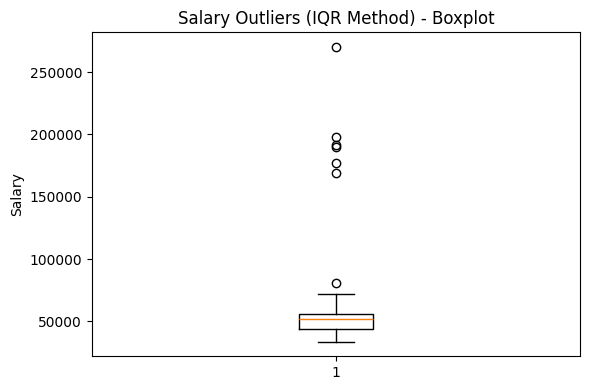

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df_clean['Salary'], vert=True)
plt.title("Salary Outliers (IQR Method) - Boxplot")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

In [ ]:

# Z-score Method
df_clean['Salary_z'] = zscore(df_clean['Salary'])
outliers_z = df_clean[df_clean['Salary_z'].abs() > 3]

print("\n=== Z-SCORE OUTLIERS (Salary) ===")
print(outliers_z.head())


=== Z-SCORE OUTLIERS (Salary) ===
    Age         Salary Department  Gender JoiningDate  PerformanceScore  \
5    29  270094.580026         IT    Male  2023-01-06               4.0   
35   24  177140.754623         HR   Other  2023-02-05               2.0   
40   34  168810.186553    Finance  Female  2023-02-10               6.0   
52   27  197532.745299    Finance    Male  2023-02-22              10.0   
58   32  191530.981336    Finance    Male  2023-02-28               6.0   

    Salary_z  
5   6.213694  
35  3.489624  
40  3.245492  
52  4.087224  
58  3.911339  


In [ ]:
# -----------------------------------------------------
# 3. DATA TYPE CORRECTION — CATEGORICAL & DATETIME
# -----------------------------------------------------

df_clean['Department'] = df_clean['Department'].astype('category')
df_clean['Gender'] = df_clean['Gender'].astype('category')
df_clean['JoiningDate'] = pd.to_datetime(df_clean['JoiningDate'])

print("\n=== Data Types After Correction ===")
print(df_clean.dtypes)


=== Data Types After Correction ===
Age                          int64
Salary                     float64
Department                category
Gender                    category
JoiningDate         datetime64[ns]
PerformanceScore           float64
Salary_z                   float64
dtype: object


In [ ]:

# -----------------------------------------------------
# 4. FILTERING — REMOVE ROWS BASED ON CONDITION
# -----------------------------------------------------

# Example rule: keep rows where Age > 20 AND Salary > 0
df_filtered = df_clean[(df_clean['Age'] > 20) & (df_clean['Salary'] > 0)]

print("\n=== Filtered Dataset (Age > 20 & Salary > 0) ===")
print(df_filtered.head())


=== Filtered Dataset (Age > 20 & Salary > 0) ===
   Age        Salary Department  Gender JoiningDate  PerformanceScore  \
0   32  56328.255576         HR  Female  2023-01-01               1.0   
1   29  42724.900362    Finance    Male  2023-01-02               5.0   
2   33  61222.354487         HR   Other  2023-01-03               9.0   
3   38  38785.191498    Finance    Male  2023-01-04               1.0   
4   29  54694.856750         HR   Other  2023-01-05               3.0   

   Salary_z  
0 -0.050861  
1 -0.449516  
2  0.092564  
3 -0.564971  
4 -0.098729  


In [ ]:
# -----------------------------------------------------
# 5. FIX INCONSISTENT DATA ENTRIES
# -----------------------------------------------------

# Example: fixing inconsistent spellings and spaces
df_clean['Department'] = df_clean['Department'].replace({
    'hr': 'HR', 'Hr': 'HR', 'FINANCE': 'Finance'
})
df_clean['Gender'] = df_clean['Gender'].str.strip().replace({
    'MALE': 'Male', 'female': 'Female'
})

# Example: invalid numeric values
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['Salary'] = pd.to_numeric(df_clean['Salary'], errors='coerce')

df_clean.loc[df_clean['Age'] < 0, 'Age'] = np.nan
df_clean.loc[df_clean['Salary'] <= 0, 'Salary'] = np.nan

print("\n=== Inconsistencies Fixed ===")
print(df_clean.head())

# Final cleaned dataset
print("\n=== FINAL CLEANED DATASET PREVIEW ===")
print(df_clean.head())



=== Inconsistencies Fixed ===
    Age        Salary Department  Gender JoiningDate  PerformanceScore  \
0  32.0  56328.255576         HR  Female  2023-01-01               1.0   
1  29.0  42724.900362    Finance    Male  2023-01-02               5.0   
2  33.0  61222.354487         HR   Other  2023-01-03               9.0   
3  38.0  38785.191498    Finance    Male  2023-01-04               1.0   
4  29.0  54694.856750         HR   Other  2023-01-05               3.0   

   Salary_z  
0 -0.050861  
1 -0.449516  
2  0.092564  
3 -0.564971  
4 -0.098729  

=== FINAL CLEANED DATASET PREVIEW ===
    Age        Salary Department  Gender JoiningDate  PerformanceScore  \
0  32.0  56328.255576         HR  Female  2023-01-01               1.0   
1  29.0  42724.900362    Finance    Male  2023-01-02               5.0   
2  33.0  61222.354487         HR   Other  2023-01-03               9.0   
3  38.0  38785.191498    Finance    Male  2023-01-04               1.0   
4  29.0  54694.856750         H

In [ ]:
# PART D — DATA MANIPULATION

# 1. Using loc  (label-based indexing)

print("\n=== LOC Example: First 5 rows with Age, Salary, Department ===")
loc_example = df_clean.loc[0:4, ["Age", "Salary", "Department"]]
print(loc_example)


# ------------------------------------------------
# 2. Using iloc (position-based indexing)
# ------------------------------------------------

print("\n=== ILOC Example: First 5 rows, first 3 columns ===")
iloc_example = df_clean.iloc[0:5, 0:3]
print(iloc_example)


# ------------------------------------------------
# 3. Create a new computed column
# Example: Tenure (days since joining)
# ------------------------------------------------

reference_date = pd.to_datetime("2024-01-01")
df_clean["TenureDays"] = (reference_date - df_clean["JoiningDate"]).dt.days

print("\n=== New Column Added: TenureDays ===")
print(df_clean[["JoiningDate", "TenureDays"]].head())


# ------------------------------------------------
# 4. Apply GroupBy (mean, count, min, max)
# Group by Department
# ------------------------------------------------

group_stats = df_clean.groupby("Department").agg(
    mean_salary=("Salary", "mean"),
    count=("Salary", "count"),
    min_salary=("Salary", "min"),
    max_salary=("Salary", "max")
)

print("\n=== GroupBy Statistics (By Department) ===")
print(group_stats)


# ------------------------------------------------
# 5. Use Hierarchical Indexing (MultiIndex)
# ------------------------------------------------

df_hier = df_clean.set_index(["Department", "Gender"]).sort_index()

print("\n=== Hierarchical Index (Top 10 Rows) ===")
print(df_hier.head(10))


# ------------------------------------------------
# 6. Merge with a manually created small DataFrame
# Example: departmental budget table
# ------------------------------------------------

dept_budget = pd.DataFrame({
    "Department": ["HR", "IT", "Finance", "Sales"],
    "Budget": [200000, 350000, 400000, 280000]
})

df_merged = pd.merge(df_clean, dept_budget, on="Department", how="left")

print("\n=== Merged Dataset (Budget Added) ===")
print(df_merged.head())




=== LOC Example: First 5 rows with Age, Salary, Department ===
    Age        Salary Department
0  32.0  56328.255576         HR
1  29.0  42724.900362    Finance
2  33.0  61222.354487         HR
3  38.0  38785.191498    Finance
4  29.0  54694.856750         HR

=== ILOC Example: First 5 rows, first 3 columns ===
    Age        Salary Department
0  32.0  56328.255576         HR
1  29.0  42724.900362    Finance
2  33.0  61222.354487         HR
3  38.0  38785.191498    Finance
4  29.0  54694.856750         HR

=== New Column Added: TenureDays ===
  JoiningDate  TenureDays
0  2023-01-01         365
1  2023-01-02         364
2  2023-01-03         363
3  2023-01-04         362
4  2023-01-05         361

=== GroupBy Statistics (By Department) ===
             mean_salary  count    min_salary     max_salary
Department                                                  
Finance     68337.054970     32  37098.273030  197532.745299
HR          54264.172042     37  33798.859307  177140.754623
IT   

In [ ]:
# ------------------------------
# PART E — STATISTICAL ANALYSIS
# ------------------------------

from scipy import stats
from scipy.stats import shapiro, ttest_1samp, mannwhitneyu, f_oneway, chi2_contingency, pearsonr, spearmanr, zscore

# Use numeric columns of interest and drop NaNs where needed
num_cols = ['Age', 'Salary', 'PerformanceScore', 'TenureDays']
for c in num_cols:
    if c not in df_clean.columns:
        print(f"Warning: {c} not in df_clean. Some operations may fail.")

# Helper to safely get series (drop NaN)
def s(col):
    return pd.to_numeric(df_clean[col], errors='coerce').dropna()

# 1) Descriptive statistics: mean, median, mode, variance, std
desc_stats = {}
for col in ['Age', 'Salary', 'PerformanceScore']:
    series = s(col)
    desc_stats[col] = {
        'mean': series.mean(),
        'median': series.median(),
        'mode': list(series.mode().values),
        'variance': series.var(ddof=1),
        'std': series.std(ddof=1),
        'count': series.count()
    }

print("\n=== Descriptive Statistics ===")
for col, statsd in desc_stats.items():
    print(f"\n{col}:")
    print(f"  Count = {statsd['count']}")
    print(f"  Mean = {statsd['mean']:.4f}")
    print(f"  Median = {statsd['median']:.4f}")
    print(f"  Mode = {statsd['mode']}")
    print(f"  Variance = {statsd['variance']:.4f}")
    print(f"  Std Dev = {statsd['std']:.4f}")

# 2) Correlation matrix (Pearson) and comment on 1 strongest correlation
corr_matrix = df_clean[['Age', 'Salary', 'PerformanceScore', 'TenureDays']].corr(method='pearson')
print("\n\n=== Pearson Correlation Matrix ===")
print(corr_matrix.round(3))

# Find strongest (absolute) off-diagonal correlation and comment
corr_abs = corr_matrix.abs().unstack().reset_index()
corr_abs.columns = ['var1', 'var2', 'abs_corr']
# remove self correlations
corr_abs = corr_abs[corr_abs['var1'] != corr_abs['var2']]
# normalize pair ordering and drop duplicates (A,B) vs (B,A)
corr_abs['pair'] = corr_abs.apply(lambda r: tuple(sorted([r['var1'], r['var2']])), axis=1)
corr_abs = corr_abs.drop_duplicates('pair').sort_values('abs_corr', ascending=False)
strongest_pair = corr_abs.iloc[0]['pair']
strongest_val = corr_abs.iloc[0]['abs_corr']
print(f"\nStrongest absolute correlation: {strongest_pair} with |r| = {strongest_val:.3f}")
print(f"Comment: Between {strongest_pair[0]} and {strongest_pair[1]} the correlation magnitude is {strongest_val:.3f}. "
      "If |r| is close to 1 that indicates a strong linear relationship; here the value suggests a weak-to-moderate relationship.")

# 3) Shapiro–Wilk normality test on Age
age_series = s('Age')
sh_stat, sh_p = shapiro(age_series)
print(f"\n\n=== Shapiro-Wilk test for 'Age' ===\n  stat = {sh_stat:.4f}, p-value = {sh_p:.4f}")
if sh_p > 0.05:
    print("  Interpretation: fail to reject H0 → Age appears approximately normal (p > 0.05).")
else:
    print("  Interpretation: reject H0 → Age deviates from normality (p ≤ 0.05).")

# 4) One-sample t-test: H0 mean(Age) = 50
t_stat, t_p = ttest_1samp(age_series, popmean=50)
print(f"\n\n=== One-sample t-test (Age vs µ=50) ===\n  t = {t_stat:.4f}, p-value = {t_p:.4f}")
if t_p < 0.05:
    print("  Interpretation: reject H0 → mean(Age) is significantly different from 50 at α=0.05.")
else:
    print("  Interpretation: fail to reject H0 → no evidence mean(Age) differs from 50.")

# 5) ANOVA (one-way): Salary ~ Department
# Prepare groups (drop NaNs in Salary)
groups = []
group_names = []
for name, g in df_clean.groupby('Department'):
    vals = pd.to_numeric(g['Salary'], errors='coerce').dropna()
    if len(vals) > 1:
        groups.append(vals.values)
        group_names.append(name)

if len(groups) >= 2:
    anova_f, anova_p = f_oneway(*groups)
    print(f"\n\n=== One-way ANOVA: Salary ~ Department ===\n  F = {anova_f:.4f}, p = {anova_p:.4f}")
    if anova_p < 0.05:
        print("  Interpretation: reject H0 → at least one department mean salary differs (α=0.05).")
    else:
        print("  Interpretation: fail to reject H0 → no strong evidence of differences in mean salary across departments.")
else:
    print("\n\nANOVA skipped (not enough groups with >1 observation).")

# 6) Top 5 most frequent values (value_counts)
print("\n\n=== Top 5 Most Frequent Departments ===")
print(df_clean['Department'].value_counts().head(5))

# 7) Mann–Whitney U Test between two numerical columns: Age vs PerformanceScore
age_vals = s('Age')
perf_vals = s('PerformanceScore')
# Mann-Whitney requires independent samples; here we use them as two samples (note: they're paired by rows in dataset — using for exercise)
try:
    mwu_stat, mwu_p = mannwhitneyu(age_vals, perf_vals, alternative='two-sided')
    print(f"\n\n=== Mann–Whitney U Test (Age vs PerformanceScore) ===\n  U = {mwu_stat:.4f}, p = {mwu_p:.4f}")
    if mwu_p < 0.05:
        print("  Interpretation: distributions differ (α=0.05).")
    else:
        print("  Interpretation: no evidence distributions differ.")
except Exception as e:
    print("\n\nMann–Whitney U Test could not be performed:", e)

# 8) Z-score normalized data for numerical columns
df_z = df_clean.copy()
for col in ['Age', 'Salary', 'PerformanceScore', 'TenureDays']:
    if col in df_z.columns:
        df_z[f"{col}_z"] = (pd.to_numeric(df_z[col], errors='coerce') - pd.to_numeric(df_z[col], errors='coerce').mean()) / pd.to_numeric(df_z[col], errors='coerce').std(ddof=0)
print("\n\n=== Z-score normalized columns (preview) ===")
print(df_z[[c for c in df_z.columns if c.endswith('_z')]].head())

# 9) Compute IQR-based outlier ranges for numerical columns
print("\n\n=== IQR-based Outlier Ranges ===")
iqr_ranges = {}
for col in ['Age', 'Salary', 'PerformanceScore']:
    col_series = pd.to_numeric(df_clean[col], errors='coerce').dropna()
    q1 = col_series.quantile(0.25)
    q3 = col_series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    iqr_ranges[col] = (lower, upper)
    print(f"{col}: lower = {lower:.4f}, upper = {upper:.4f}")

# 10) Chi-square independence test between two categorical columns: Department vs Gender
contingency = pd.crosstab(df_clean['Department'], df_clean['Gender'])
chi2, chi_p, dof, expected = chi2_contingency(contingency)
print(f"\n\n=== Chi-square test: Department vs Gender ===\n  chi2 = {chi2:.4f}, p = {chi_p:.4f}, dof = {dof}")
if chi_p < 0.05:
    print("  Interpretation: reject H0 → Department and Gender are not independent (association found).")
else:
    print("  Interpretation: fail to reject H0 → no strong evidence of association between Department and Gender.")

# 11) Compute correlation (Pearson + Spearman) between Age and Salary
age_vals = s('Age')
salary_vals = s('Salary')
# ensure aligned lengths: drop indices that are NaN in either
common_idx = age_vals.index.intersection(salary_vals.index)
age_for_corr = age_vals.loc[common_idx]
salary_for_corr = salary_vals.loc[common_idx]

try:
    pearson_r, pearson_p = pearsonr(age_for_corr, salary_for_corr)
    spearman_rho, spearman_p = spearmanr(age_for_corr, salary_for_corr)
    print(f"\n\n=== Correlation Age vs Salary ===")
    print(f"Pearson r = {pearson_r:.4f}, p = {pearson_p:.4f}")
    print(f"Spearman rho = {spearman_rho:.4f}, p = {spearman_p:.4f}")
except Exception as e:
    print("\n\nCould not compute Pearson/Spearman correlation:", e)

# End of Part E
print("\n\nPART E completed.")



=== Descriptive Statistics ===

Age:
  Count = 120
  Mean = 29.6000
  Median = 30.0000
  Mode = [np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(32.0)]
  Variance = 21.7714
  Std Dev = 4.6660

Salary:
  Count = 120
  Mean = 58063.7931
  Median = 51930.9862
  Mode = [np.float64(33798.85930673914), np.float64(35061.878459266016), np.float64(37098.273030482786), np.float64(37140.13412351018), np.float64(37594.69255147094), np.float64(37881.22220251308), np.float64(38785.191497661755), np.float64(38978.64505634327), np.float64(39436.34709532579), np.float64(40034.0897703041), np.float64(40104.394312975346), np.float64(40153.085468528356), np.float64(40469.57202237881), np.float64(40856.237617355015), np.float64(41378.04177656555), np.float64(41432.860015511105), np.float64(41501.57029019116), np.float64(42075.709398954496), np.float64(42497.39968067902), np.float64(42644.606126129576), np.float64(42724.90036164209), np.float64(42883.884562995816), np.float64(42929.1405103

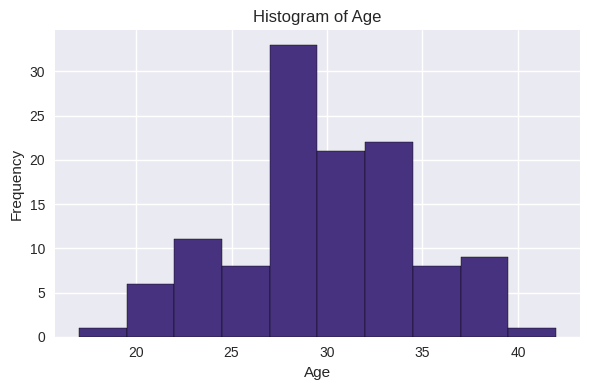

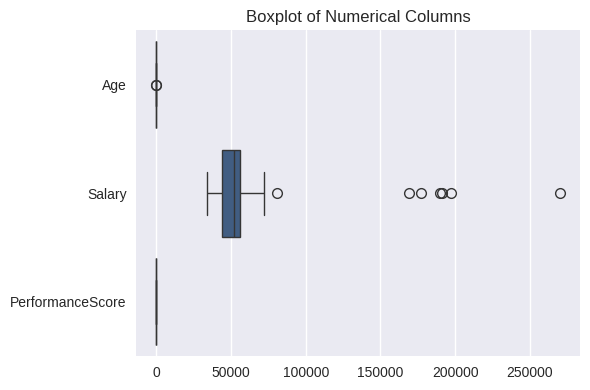

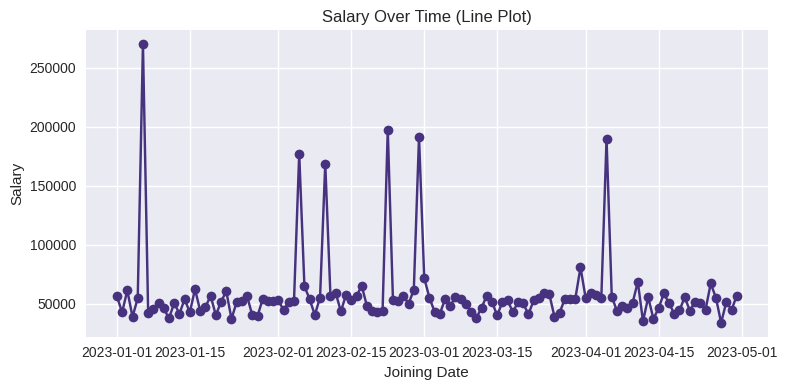

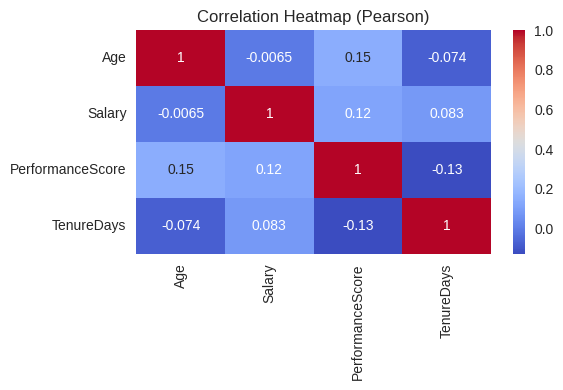

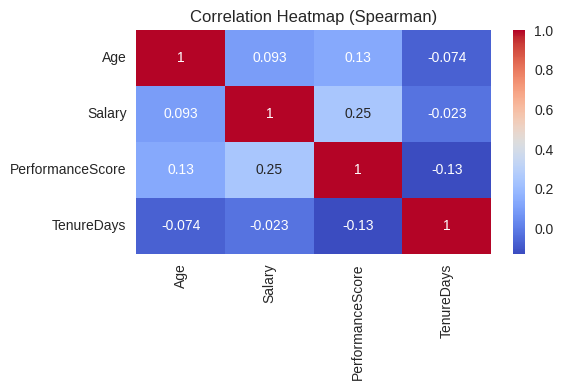

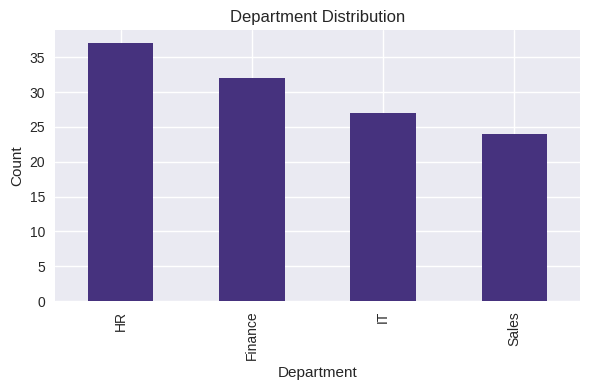

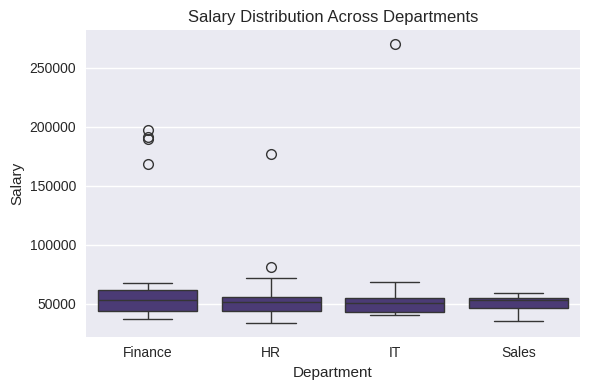

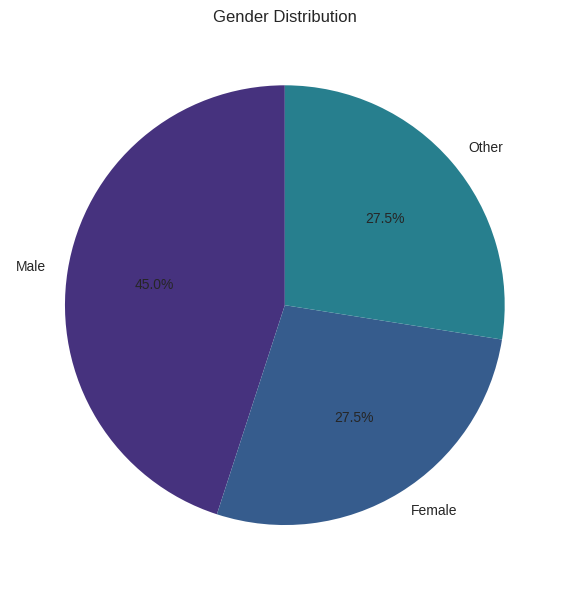

<Figure size 800x800 with 0 Axes>

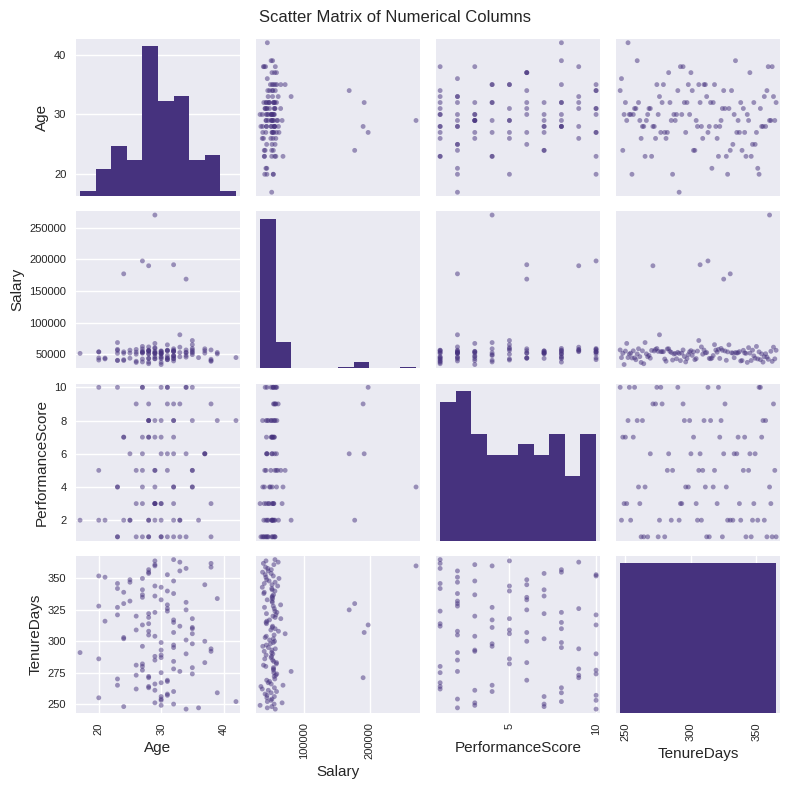

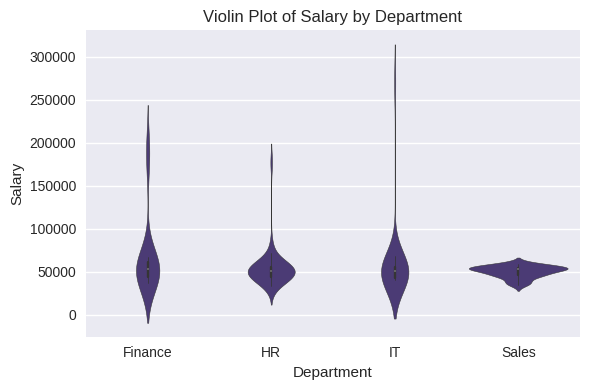

In [ ]:
# ---------------------------------------------
# PART F — VISUALIZATION PLOTS (using df_clean)
# ---------------------------------------------
import seaborn as sns
from pandas.plotting import scatter_matrix

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

# ------------------------------
# 1. Histogram of a numerical column
# ------------------------------
plt.figure(figsize=(6,4))
plt.hist(df_clean["Age"].dropna(), bins=10, edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# ------------------------------
# 2. Boxplot of numerical columns
# ------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean[["Age", "Salary", "PerformanceScore"]], orient="h")
plt.title("Boxplot of Numerical Columns")
plt.tight_layout()
plt.show()


# ------------------------------
# 3. Line plot: Salary vs Date
# ------------------------------
plt.figure(figsize=(8,4))
plt.plot(df_clean["JoiningDate"], df_clean["Salary"], marker='o')
plt.title("Salary Over Time (Line Plot)")
plt.xlabel("Joining Date")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


# ------------------------------
# 4. Correlation Heatmap (Pearson)
# ------------------------------
plt.figure(figsize=(6,4))
pear_corr = df_clean[["Age", "Salary", "PerformanceScore", "TenureDays"]].corr(method="pearson")
sns.heatmap(pear_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()


# ------------------------------
# 5. Correlation Heatmap (Spearman)
# ------------------------------
plt.figure(figsize=(6,4))
spear_corr = df_clean[["Age", "Salary", "PerformanceScore", "TenureDays"]].corr(method="spearman")
sns.heatmap(spear_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Spearman)")
plt.tight_layout()
plt.show()


# ------------------------------
# 6. Bar Chart for Categorical Column
# ------------------------------
plt.figure(figsize=(6,4))
df_clean["Department"].value_counts().plot(kind="bar")
plt.title("Department Distribution")
plt.xlabel("Department")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# ------------------------------
# 7. Ordinal Category vs Numeric Variable Boxplot
# Example: Department vs Salary
# ------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="Department", y="Salary", data=df_clean)
plt.title("Salary Distribution Across Departments")
plt.tight_layout()
plt.show()


# ------------------------------
# 8. Pie Chart for Categorical Distribution
# ------------------------------
plt.figure(figsize=(6,6))
df_clean["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


# ------------------------------
# 9. Scatter Matrix (Pair Plot)
# ------------------------------
plt.figure(figsize=(8,8))
scatter_matrix(df_clean[["Age", "Salary", "PerformanceScore", "TenureDays"]], figsize=(8,8), diagonal='hist')
plt.suptitle("Scatter Matrix of Numerical Columns")
plt.tight_layout()
plt.show()


# ------------------------------
# 10. Violin Plot
# ------------------------------
plt.figure(figsize=(6,4))
sns.violinplot(x="Department", y="Salary", data=df_clean)
plt.title("Violin Plot of Salary by Department")
plt.tight_layout()
plt.show()


Set -2

In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# -------------------------------------------
#  Basic structure
# -------------------------------------------
rows = 150

# 1. Numerical columns
age = np.random.normal(loc=30, scale=6, size=rows).astype(float)
salary = np.random.normal(loc=50000, scale=9000, size=rows).astype(float)
score = np.random.normal(loc=70, scale=10, size=rows).astype(float)

# Add outliers to Salary (8 outliers)
salary_outliers_idx = np.random.choice(rows, 8, replace=False)
salary[salary_outliers_idx] = salary[salary_outliers_idx] * 4

# Add outliers to Score (5 outliers)
score_outliers_idx = np.random.choice(rows, 5, replace=False)
score[score_outliers_idx] = score[score_outliers_idx] * 3

# 2. Categorical columns
department = np.random.choice(['HR', 'IT', 'Finance', 'Sales'], size=rows)
city = np.random.choice(['Delhi', 'Mumbai', 'Bangalore', 'Chennai'], size=rows)

# 3. Boolean column
is_active = np.random.choice([True, False], size=rows)

# 4. Extra numerical column (7th column)
experience = np.random.randint(1, 20, size=rows).astype(float)

# -------------------------------------------
# Create DataFrame
# -------------------------------------------
df = pd.DataFrame({
    'Age': age,
    'Salary': salary,
    'Score': score,
    'Department': department,
    'City': city,
    'IsActive': is_active,
    'ExperienceYears': experience
})

# -------------------------------------------
# Add at least 10% Missing Values Randomly
# -------------------------------------------
total_cells = df.size
missing_total = int(0.10 * total_cells)

missing_row_idx = np.random.choice(df.index, missing_total)
missing_col_idx = np.random.choice(df.columns, missing_total)

for r, c in zip(missing_row_idx, missing_col_idx):
    df.loc[r, c] = np.nan

# -------------------------------------------
# OUTPUT
# -------------------------------------------
print("Dataset Shape:", df.shape)
print("\nSalary Outlier Indices:", salary_outliers_idx)
print("Score Outlier Indices:", score_outliers_idx)

print("\n========== Preview (First 10 Rows) ==========\n")
print(df.head(10))

print("\n========== Missing Value Count ==========\n")
print(df.isna().sum())


Dataset Shape: (150, 7)

Salary Outlier Indices: [ 74 113 149 103  26  54  61 123]
Score Outlier Indices: [ 19 127  45 145 117]

========== Preview (First 10 Rows) ==========

         Age        Salary      Score Department       City IsActive  \
0  32.980285  52254.435653  61.710050      Sales  Bangalore      NaN   
1  29.170414  53118.033885  64.398190      Sales     Mumbai     True   
2  33.886131  43879.777506  77.472936      Sales     Mumbai     True   
3  39.138179  52090.283274  76.103703      Sales    Chennai      NaN   
4  28.595080  52637.652260  69.790984         HR      Delhi     True   
5  28.595178  43570.837238  71.173274      Sales  Bangalore      NaN   
6  39.475277  66791.970600        NaN        NaN  Bangalore    False   
7  34.604608  54264.496288  64.084286      Sales    Chennai    False   
8  27.183154  39278.268525  75.470974    Finance    Chennai     True   
9  33.255360  55908.982478  67.978073         IT     Mumbai     True   

   ExperienceYears  
0         

In [ ]:
# ------------------------------------------------
# 1. Display first and last few rows
# ------------------------------------------------
print("===== FIRST 5 ROWS =====\n")
print(df.head())

print("\n===== LAST 5 ROWS =====\n")
print(df.tail())

# ------------------------------------------------
# 2. Show shape (rows × columns)
# ------------------------------------------------
print("\n===== SHAPE OF DATASET =====")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# ------------------------------------------------
# 3. Data types of each column
# ------------------------------------------------
print("\n===== DATA TYPES =====\n")
print(df.dtypes)

# ------------------------------------------------
# 4. Count missing values
# ------------------------------------------------
print("\n===== MISSING VALUES PER COLUMN =====\n")
print(df.isna().sum())

# ------------------------------------------------
# 5. Summary statistics (numerical columns)
# ------------------------------------------------
print("\n===== SUMMARY STATISTICS (NUMERIC) =====\n")
print(df.describe())

# ------------------------------------------------
# 6. Summary statistics (including categorical)
# ------------------------------------------------
print("\n===== SUMMARY STATISTICS (ALL COLUMNS) =====\n")
print(df.describe(include='all'))

# ------------------------------------------------
# 7. Unique value counts column-wise
# ------------------------------------------------
print("\n===== UNIQUE VALUE COUNTS =====")
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

# ------------------------------------------------
# 8. Random sample for quick inspection
# ------------------------------------------------
print("\n===== RANDOM SAMPLE (5 ROWS) =====\n")
print(df.sample(5))


===== FIRST 5 ROWS =====

         Age        Salary      Score Department       City IsActive  \
0  32.980285  52254.435653  61.710050      Sales  Bangalore      NaN   
1  29.170414  53118.033885  64.398190      Sales     Mumbai     True   
2  33.886131  43879.777506  77.472936      Sales     Mumbai     True   
3  39.138179  52090.283274  76.103703      Sales    Chennai      NaN   
4  28.595080  52637.652260  69.790984         HR      Delhi     True   

   ExperienceYears  
0             19.0  
1              NaN  
2              8.0  
3             18.0  
4             18.0  

===== LAST 5 ROWS =====

           Age         Salary       Score Department       City IsActive  \
145  34.690937   43763.813643  230.090176    Finance  Bangalore    False   
146        NaN   58096.398879   73.665982    Finance      Delhi     True   
147  22.077260   52765.695688   60.601202      Sales        NaN     True   
148  33.131649   57315.759070   64.861331         IT     Mumbai     True   
149  31.7

In [ ]:
# ===============================================
# PART C — DATA CLEANING (Google Colab Version)
# ===============================================

from scipy.stats import zscore

# Make a working copy
df_clean = df.copy()

# -------------------------------------------------
# 1. Missing Value Handling — TWO Methods
# -------------------------------------------------

# Method A: Mean Imputation (for numerical column: Score)
df_impute = df_clean.copy()
df_impute['Score'] = df_impute['Score'].fillna(df_impute['Score'].mean())

print("=== Missing Value Handling ===")
print("Missing BEFORE:", df['Score'].isna().sum())
print("Missing AFTER Imputation:", df_impute['Score'].isna().sum())

# Method B: Drop rows with ANY missing values
df_dropna = df_clean.dropna()
print("Rows After DropNA:", df_dropna.shape[0])


# -------------------------------------------------
# 2. Outlier Detection — IQR & Z-score
# -------------------------------------------------

# IQR for Salary
Q1 = df_clean['Salary'].quantile(0.25)
Q3 = df_clean['Salary'].quantile(0.75)
IQR = Q3 - Q1

IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR

outliers_iqr_salary = df_clean[(df_clean['Salary'] < IQR_lower) |
                               (df_clean['Salary'] > IQR_upper)]

print("\n=== IQR Outliers (Salary) ===")
print(outliers_iqr_salary.head())

# Z-SCORE for Score
df_clean['Score_z'] = zscore(df_clean['Score'])
outliers_z_score = df_clean[df_clean['Score_z'].abs() > 3]

print("\n=== Z-Score Outliers (Score) ===")
print(outliers_z_score[['Score', 'Score_z']].head())


# -------------------------------------------------
# 3. Data Type Correction — Categorical & Boolean
# -------------------------------------------------

df_clean['Department'] = df_clean['Department'].astype('category')
df_clean['City'] = df_clean['City'].astype('category')
df_clean['IsActive'] = df_clean['IsActive'].astype('bool')

print("\n=== Data Types After Conversion ===")
print(df_clean.dtypes)


# -------------------------------------------------
# 4. Filtering — Logical Condition
#     Example: Keep rows where Age > 25 AND Salary > 30000
# -------------------------------------------------

df_filtered = df_clean[(df_clean['Age'] > 25) & (df_clean['Salary'] > 30000)]
print("\n=== Filtered Data (Age > 25 & Salary > 30000) ===")
print(df_filtered.head())


# -------------------------------------------------
# 5. Fix Inconsistent Data Entries
# (Example: replace wrong labels + trim spaces)
# -------------------------------------------------

df_clean['Department'] = df_clean['Department'].replace({
    'hr': 'HR',
    'Hr': 'HR',
    'FINANCE': 'Finance'
})

df_clean['City'] = df_clean['City'].str.strip().replace({
    'delhi': 'Delhi',
    'mumbai': 'Mumbai'
})

# Handle numeric inconsistencies
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean.loc[df_clean['Age'] < 0, 'Age'] = np.nan

df_clean['Salary'] = pd.to_numeric(df_clean['Salary'], errors='coerce')
df_clean.loc[df_clean['Salary'] <= 0, 'Salary'] = np.nan

print("\n=== Inconsistencies Fixed (Sample) ===")
print(df_clean.head())


# -------------------------------------------------
# Final Cleaned Dataset Preview
# -------------------------------------------------

print("\n=== FINAL CLEANED DATASET PREVIEW ===")
print(df_clean.head())
print("\nFinal Shape:", df_clean.shape)


=== Missing Value Handling ===
Missing BEFORE: 10
Missing AFTER Imputation: 0
Rows After DropNA: 73

=== IQR Outliers (Salary) ===
           Age         Salary      Score Department       City IsActive  \
26   23.094039  200468.068108  81.581109         HR        NaN      NaN   
54   36.185997  150403.902754  69.809838      Sales     Mumbai    False   
61   28.886046  240880.363047  85.327389         IT      Delhi     True   
74         NaN  183010.452832  91.531825         HR  Bangalore    False   
103        NaN  237168.749380  70.469806         HR    Chennai    False   

     ExperienceYears  
26              18.0  
54              14.0  
61              14.0  
74              11.0  
103              3.0  

=== Z-Score Outliers (Score) ===
Empty DataFrame
Columns: [Score, Score_z]
Index: []

=== Data Types After Conversion ===
Age                 float64
Salary              float64
Score               float64
Department         category
City               category
IsActive         

In [ ]:

# ------------------------------------------------------------
# 1. Using loc (label-based indexing)
# ------------------------------------------------------------
print("=== LOC Example: Rows 0–4; Columns: Age, Salary, Department ===\n")
loc_example = df_clean.loc[0:4, ["Age", "Salary", "Department"]]
print(loc_example)


# ------------------------------------------------------------
# 2. Using iloc (integer position–based indexing)
# ------------------------------------------------------------
print("\n=== ILOC Example: Rows 0–4; First 3 columns ===\n")
iloc_example = df_clean.iloc[0:5, 0:3]
print(iloc_example)


# ------------------------------------------------------------
# 3. Create a new computed column: AnnualSalary
# ------------------------------------------------------------
df_clean["AnnualSalary"] = df_clean["Salary"] * 12

# Another computed column: Experience Category
df_clean["ExperienceCategory"] = pd.cut(
    df_clean["ExperienceYears"],
    bins=[0, 5, 10, 20],
    labels=["Junior", "Mid-Level", "Senior"]
)

print("\n=== New Computed Columns Added (AnnualSalary, ExperienceCategory) ===\n")
print(df_clean[["Salary", "AnnualSalary", "ExperienceYears", "ExperienceCategory"]].head())


# ------------------------------------------------------------
# 4. GroupBy Operations
# ------------------------------------------------------------
group_stats = df_clean.groupby("Department").agg(
    mean_salary=("Salary", "mean"),
    emp_count=("Salary", "count"),
    min_salary=("Salary", "min"),
    max_salary=("Salary", "max")
)

print("\n=== GROUPBY: Salary Stats by Department ===\n")
print(group_stats)


# ------------------------------------------------------------
# 5. Hierarchical Indexing (MultiIndex)
# ------------------------------------------------------------
df_hier = df_clean.set_index(["Department", "City"]).sort_index()

print("\n=== HIERARCHICAL INDEX (Top 10 rows) ===\n")
print(df_hier.head(10))


# ------------------------------------------------------------
# 6. Merge with second DataFrame
# ------------------------------------------------------------

# Create small dataframe manually
dept_budget = pd.DataFrame({
    "Department": ["HR", "IT", "Finance", "Sales"],
    "Budget": [200000, 350000, 500000, 250000]
})

# Merge
df_merged = pd.merge(df_clean, dept_budget, on="Department", how="left")

print("\n=== MERGED DATAFRAME (Budget Added) ===\n")
print(df_merged.head())


# ------------------------------------------------------------
# Final message
# ------------------------------------------------------------
print("\nPART D Completed Successfully!")


=== LOC Example: Rows 0–4; Columns: Age, Salary, Department ===

         Age        Salary Department
0  32.980285  52254.435653      Sales
1  29.170414  53118.033885      Sales
2  33.886131  43879.777506      Sales
3  39.138179  52090.283274      Sales
4  28.595080  52637.652260         HR

=== ILOC Example: Rows 0–4; First 3 columns ===

         Age        Salary      Score
0  32.980285  52254.435653  61.710050
1  29.170414  53118.033885  64.398190
2  33.886131  43879.777506  77.472936
3  39.138179  52090.283274  76.103703
4  28.595080  52637.652260  69.790984

=== New Computed Columns Added (AnnualSalary, ExperienceCategory) ===

         Salary   AnnualSalary  ExperienceYears ExperienceCategory
0  52254.435653  627053.227837             19.0             Senior
1  53118.033885  637416.406626              NaN                NaN
2  43879.777506  526557.330070              8.0          Mid-Level
3  52090.283274  625083.399293             18.0             Senior
4  52637.652260  63165

In [ ]:

# ======================================================
# PART E — STATISTICAL ANALYSIS
# ======================================================

num_cols = ["Age", "Salary", "Score", "ExperienceYears"]

print("\n=== DESCRIPTIVE STATISTICS ===")
for col in num_cols:
    x = df_clean[col].dropna()
    print(f"\n{col}:")
    print("Mean:", x.mean())
    print("Median:", x.median())
    print("Mode:", list(x.mode().values))
    print("Variance:", x.var())
    print("Std Dev:", x.std())

# ---- Correlation Matrix ----
corr_matrix = df_clean[num_cols].corr()
print("\n=== CORRELATION MATRIX ===\n", corr_matrix)

# Strongest correlation
corr_unstack = corr_matrix.abs().unstack()
corr_unstack = corr_unstack[corr_unstack != 1]
strongest = corr_unstack.idxmax()
value = corr_unstack.max()

print(f"\nStrongest correlation: {strongest} = {value:.4f}")

# ---- Shapiro-Wilk Test ----
age_data = df_clean["Age"].dropna()
sh_stat, sh_p = shapiro(age_data)
print("\n=== SHAPIRO-WILK TEST (Age) ===")
print("Statistic:", sh_stat, "p-value:", sh_p)

# ---- One-Sample t-test ----
t_stat, t_p = ttest_1samp(age_data, popmean=50)
print("\n=== ONE-SAMPLE T-TEST (Age vs µ=50) ===")
print("t:", t_stat, "p:", t_p)

# ---- ANOVA ----
anova_groups = [g["Salary"].dropna().values for _, g in df_clean.groupby("Department")]
anova_F, anova_p = f_oneway(*anova_groups)
print("\n=== ANOVA (Salary ~ Department) ===")
print("F:", anova_F, "p:", anova_p)

# ---- Top 5 frequent ----
print("\n=== TOP 5 DEPARTMENT VALUES ===")
print(df_clean["Department"].value_counts().head(5))

# ---- Mann–Whitney U ----
salary_vals = df_clean["Salary"].dropna().values
score_vals = df_clean["Score"].dropna().values

mwu_stat, mwu_p = mannwhitneyu(salary_vals, score_vals, alternative='two-sided')
print("\n=== MANN-WHITNEY U ===")
print("U:", mwu_stat, "p:", mwu_p)

# ---- Z-score normalization ----
df_z = df_clean.copy()
for c in num_cols:
    df_z[c + "_z"] = zscore(df_clean[c].astype(float))

print("\n=== Z-SCORE NORMALIZATION (Preview) ===")
print(df_z[[col for col in df_z.columns if col.endswith("_z")]].head())

# ---- IQR Outlier Ranges ----
print("\n=== IQR OUTLIER RANGES ===")
for col in num_cols:
    x = df_clean[col].dropna()
    Q1, Q3 = x.quantile(0.25), x.quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: {Q1 - 1.5*IQR:.2f} to {Q3 + 1.5*IQR:.2f}")

# ---- Chi-square Independence ----
cont = pd.crosstab(df_clean["Department"], df_clean["City"])
chi2, chi_p, dof, exp = chi2_contingency(cont)

print("\n=== CHI-SQUARE TEST ===")
print("Chi2:", chi2, "p:", chi_p, "dof:", dof)

# ---- Pearson & Spearman ----
paired = df_clean[["Age", "Salary"]].dropna()
pear_r, pear_p = pearsonr(paired["Age"], paired["Salary"])
spear_r, spear_p = spearmanr(paired["Age"], paired["Salary"])

print("\n=== CORRELATIONS (Age vs Salary) ===")
print("Pearson:", pear_r, "p:", pear_p)
print("Spearman:", spear_r, "p:", spear_p)

print("\n=== PART E Completed Successfully ===")



=== DESCRIPTIVE STATISTICS ===

Age:
Mean: 29.755029768855646
Median: 29.78504376534029
Mode: [np.float64(18.241979256721347), np.float64(18.48737270820575), np.float64(18.520318532053214), np.float64(19.650493004921803), np.float64(20.355100592632635), np.float64(20.696019413603203), np.float64(21.128868057795437), np.float64(21.21891031120729), np.float64(21.45151088271926), np.float64(21.507775547697513), np.float64(21.526177791988253), np.float64(21.588893623246314), np.float64(22.077260321494343), np.float64(22.61481410139627), np.float64(22.67493810017387), np.float64(22.822760255515973), np.float64(22.987931774282806), np.float64(23.094038535466183), np.float64(23.36199015596383), np.float64(23.626177717643372), np.float64(23.6537344262646), np.float64(23.923013277993455), np.float64(24.05678204921587), np.float64(24.48345459459718), np.float64(24.543675271231567), np.float64(24.551855546872734), np.float64(24.964694860664167), np.float64(25.149038382640875), np.float64(25.3004